## Replicator dynamics 

The [replicator equation](https://en.wikipedia.org/wiki/Replicator_equation) derives from a model in which the dynamics of populations of multiple interacting species are related to their evolutionary fitness. All species $i$ have population sizes $p_i$, contained in a vector $\boldsymbol{p}$, that are expressed as proportions (akin percentages). That is to say, population sizes are relative, scaled such that their sum equals one by definition: $\sum_i p_i = 1$.

<img src="https://quizizz.com/_media/quizzes/6fbff17f-4929-4727-88b4-5ce9b04bc2db_900_900" style="float:right;" width="30%" height="30%" />For example, if a biotope contains four species:

1. 🌿 a producer species,

2. 🐇 a herbivore species,

3. 🐺 a carnivore species, and

4. 🍄 a decomposer species;

and if initially at time $t=0$ all species are equally prevalent, then the initial state is described by a column vector

$$
\begin{aligned}
\boldsymbol{p}(0) &= \left[ p_1, p_2, p_3, p_4 \right]^\text{T}
\\
&= \left[ \tfrac{1}{4}, \tfrac{1}{4}, \tfrac{1}{4}, \tfrac{1}{4} \right]^\text{T}
\end{aligned}
$$

In [1]:
# Importing Libraries
from matplotlib import pyplot as plt
import numpy as np
from optimization import Optimizers

In [2]:
p0 = np.ones((4, 1)) / 4
print(f'p0 =\n{p0}')

p0 =
[[0.25]
 [0.25]
 [0.25]
 [0.25]]


According to a linearized version of the replicator model, the differential equation that governs the development of populations over time $\boldsymbol{p}(t)$ is

$$
\frac{\text{d}}{\text{d}t}\boldsymbol{p} = \boldsymbol{p} \odot \left( \boldsymbol{A}\boldsymbol{p} - \boldsymbol{p}^\text{T}\boldsymbol{A}\boldsymbol{p} \right)
$$

Here, the $\odot$-operator denotes [element-wise](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) multiplication of vectors, resulting in another vector (as opposed to their dot-product that results in a scalar).

The entries of the matrix $\boldsymbol{A}$ denote the influence of one species over the other:

* $A_{ij} > 0$ indicates that the presence of species $j$ promotes the proliferation of species $i$ (for example, prey species promote predator species);

* $A_{ij} < 0$ indicates that the presence of species $j$ suppresses the proliferation of species $i$ (for example, predator species inhibit prey species).

For the previous example involving four species, the matrix $\boldsymbol{A}$ may equal

$$
\boldsymbol{A} = \left[ \begin{matrix}
+0.1 & -0.9 & 0.0 & +0.2
\\
+0.4 & +0.3 & -0.8 & 0.0
\\
0.0 & +0.6 & -0.1 & 0.0
\\
+0.1 & +0.2 & +0.2 & -0.5
\end{matrix} \right]
$$

In [3]:
A = np.array([[.1, -.9, .0, .2], [.4, .3, -.8, .0], [.0, .6, -.1, .0], [.1, .2, .2, -.5]])
print(f'A =\n{A}')

A =
[[ 0.1 -0.9  0.   0.2]
 [ 0.4  0.3 -0.8  0. ]
 [ 0.   0.6 -0.1  0. ]
 [ 0.1  0.2  0.2 -0.5]]


Using the matrix `A` created, we will now write a python function `r(p)` that returns the right hand side of the above replicator model equation

$$
\boldsymbol{r}(\boldsymbol{p}) = \boldsymbol{p} \odot \left( \boldsymbol{A}\boldsymbol{p} - \boldsymbol{p}^\text{T}\boldsymbol{A}\boldsymbol{p} \right)
$$

Both the argument and the return value of this function are *column* vectors.

For the given array `p0`, we will use this function to compute the value of `r(p0)`.

In [4]:
def r(p):
    return p*(A @ p - p.T @ A @ p)

In [5]:
# Initial values
r(p0)

array([[-0.034375],
       [-0.003125],
       [ 0.034375],
       [ 0.003125]])

### The Runge-Kutta Method Family

All of the below methods form special cases in a more general [Runge-Kutta family of methods](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods) that calculate any number of intermediate derivatives according to the following equations

$$
\begin{aligned}
\boldsymbol{k}_0 &= h \cdot \boldsymbol{f}(x, \boldsymbol{y}(x))
\\
\boldsymbol{k}_1 &= h \cdot \boldsymbol{f}(x + q_{1,0} \cdot h, \boldsymbol{y}(x) + q_{1,0} \cdot \boldsymbol{k}_0)
\\
\boldsymbol{k}_2 &= h \cdot \boldsymbol{f}(x + (q_{2,0} + q_{2,1}) \cdot h, \boldsymbol{y}(x) + q_{2,0} \cdot \boldsymbol{k}_0 + q_{2,1} \cdot \boldsymbol{k}_1)
\\
\vdots
\\
\boldsymbol{k}_n &= h \cdot \boldsymbol{f}(x + \sum_{m=0}^{n-1} q_{nm} \cdot h, \boldsymbol{y}(x) + \sum_{m=0}^{n-1} q_{nm} \cdot \boldsymbol{k}_m)
\end{aligned}
$$

followed by a final single step

$$
\boldsymbol{y}(x + h) = \boldsymbol{y}(x) + \sum_{m=0}^{n} c_m \cdot \boldsymbol{k}_m
$$

The coefficients of many such methods can be found in reference books or online; some of the more important examples are listed below in the form of Butcher tables. 

| Method | Order | $\boldsymbol{c}$ | $\boldsymbol{q}$ |
| - | - | - | - |
| Euler's | 1 | $1$ | $\times$ |
| Midpoint | 2 | $0$, $1$ | $\frac{1}{2}$ |
| Kutta's | 3 | $\frac{1}{6}$, $\frac{2}{3}$, $\frac{1}{6}$ | $\begin{array}{cc} \frac{1}{2} & \\ -1 & 2 \end{array}$|
| Runge-Kutta's | 4 | $\frac{1}{6}$, $\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{6}$ | $\begin{array}{ccc} \frac{1}{2} & & \\ 0 & \frac{1}{2} & \\ 0 & 0 & 1 \end{array}$ |
| 3/8-rule | 4 | $\frac{1}{8}$, $\frac{3}{8}$, $\frac{3}{8}$, $\frac{1}{8}$ | $\begin{array}{ccc} \frac{1}{3} & & \\ -\frac{1}{3} & 1 & \\ 1 & -1 & 1 \end{array}$ |
| SSPRK4 | 4 | $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{2}$ | $\begin{array}{ccc} \frac{1}{2} & & \\ \frac{1}{2} & \frac{1}{2} & \\ \frac{1}{6} & \frac{1}{6} & \frac{1}{6} \end{array}$ |


Third-order methods are not popular in computer application. Most programmers prefer integration formulas of order four, which achieve a given accuracy with less computational effort. The Runge-Kutta method is popular in particular because it combines an adequate accuracy (being of order 4) with a relative simplicity (because several $q_{nm}$ equal zero).

In [6]:
def Runge_Kutta_4(f, y0, t, *, steps=1000):
    """y_t = Runge_Kutta_4(f, y0, t, *, steps=1000).
    Ralston's 3rd-order method for solving the initial value
    problem {y}' = {f({y})}, where {y} = {y[0],y[1],...,y[n-1]}.
    f      = user-supplied function that returns the
             array f(y) = {y’[0],y’[1],...,y’[n-1]}.
    y0     = initial condition at t = 0
    t      = terminal value of the abcissa
    steps  = number of integration steps (default 1000)
    """
    h = t / steps
    xs = np.linspace(0, t, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        k0 = f(y)
        k1 = f(y + (h/2)*k0)
        k2 = f(y + (-h)*k0 + 2*h*k1 )
        y = y + (h*(k0 + 4*k1 + k2))/ 6

    return  y 

We can now apply Runge Kutta's fourth-order method to integrate the given example of the replicator model $\frac{\text{d}}{\text{d}t}\boldsymbol{p} = \boldsymbol{r}(\boldsymbol{p})$ to find the population sizes $\boldsymbol{p}(t)$ of all four species at any given time $t$, as follows.

In [7]:
def p(t):
    steps = int(abs(t)+1.5)
    vector = Runge_Kutta_4(r, p0, t, steps=steps)
    return vector.flatten()

# Example: calculate populations of all four species at t=200
print(f'p(200) = {np.around(p(200), 4)}')

p(200) = [0.     0.5246 0.4483 0.0272]


Over time, the populations turn out to oscillate in quasi-periodic fashion. Below, the estimated populations of all four species are plotted between $t=0$ and $400$. Unsurprisingly, the carnivore population tends to peak shortly after the herbivore population, which in turn peaks after the producer population.

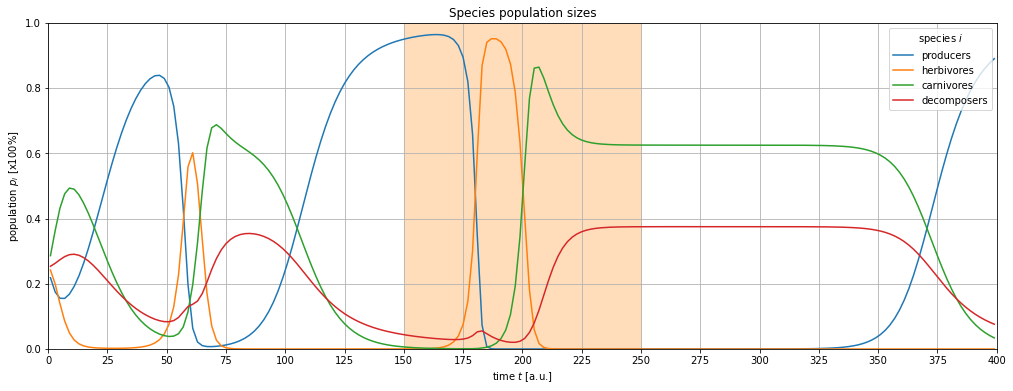

In [8]:
time = np.arange(1, 400, 2)
populations = [p(t) for t in time]

plt.figure(figsize=(17, 6))

plt.plot(time, populations, '-')
plt.fill_between((150., 250.), (1., 1.), color='#ffddbb')

plt.xlabel('time $t$ [a.u.]'); plt.ylabel('population $p_i$ [x100%]') 
plt.title('Species population sizes')
plt.legend(('producers', 'herbivores', 'carnivores', 'decomposers'), title='species $i$', loc='upper right')
plt.axis((0., 400., 0., 1.))
plt.xticks(range(0, 401, 25)) 
plt.grid(True)

plt.show()

In [9]:
# Helper functions that get only one species at a time!

def producers(t):
    return p(t)[0]
prod = [producers(t) for t in time]

def herbivores(t):
    return p(t)[1]
herb = [herbivores(t) for t in time]

def carnivores(t):
    return p(t)[2]
carne = [carnivores(t) for t in time]

def decomposers(t):
    return p(t)[3]
decomp = [decomposers(t) for t in time]

We will count the number of local minima that occur in the population size of the decomposer species (i.e. $p_4(t)$) inside the shaded interval $150 \leq t \leq 250$.

The local min can be found at : 171.50
The local min can be found at : 196.08


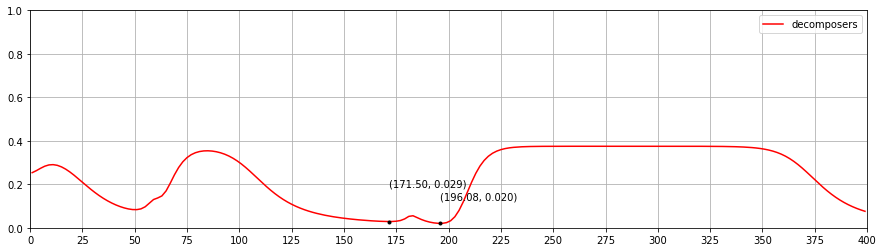

In [10]:
plt.figure(figsize=(15, 4))

plt.plot(time,decomp, '-r',label = 'decomposers')
for (lo, hi) in list(Optimizers.minimumsearch(decomposers, 150, 250, 50)):

    xmin = Optimizers.golden_search(decomposers,lo, hi, 1e-8)
    ymin = decomposers(xmin)
    plt.plot(xmin, ymin, '.k')
    print(f'The local min can be found at : {xmin:.2f}')
    plt.text(xmin, 7*ymin, f'({xmin:.2f}, {ymin:.3f})', verticalalignment='center')


plt.axis((0., 400., 0., 1.))
plt.xticks(range(0, 401, 25))
plt.grid(True)
plt.legend()
plt.show()

We will evaluate and print with 2 correct digits behind the decimal point the time difference $\Delta t_{1,2}$ between the maxima in the producer and herbivore population as well as the time difference $\Delta t_{2,3}$ between the maxima in the herbivore and carnivore population inside the interval $150 \leq t \leq 250$ (i.e. the horizontal separation between the blue and orange peaks and between the orange and green peaks in the shaded region).

In [11]:
for (lo, hi) in list(Optimizers.maximumsearch(producers, 150, 250, 50)):
    xmax_prod = Optimizers.golden_search_max(producers,lo, hi, 1e-2)
    ymax_prod = producers(xmax_prod)

for (lo, hi) in list(Optimizers.maximumsearch(herbivores, 150, 250, 50)):
    xmax_herb = Optimizers.golden_search_max(herbivores,lo, hi, 1e-2)
    ymax_herb = herbivores(xmax_herb)

for (lo, hi) in list(Optimizers.maximumsearch(carnivores, 150, 250, 50)):
    xmax_carn = Optimizers.golden_search_max(carnivores,lo, hi, 1e-2)
    ymax_carn = carnivores(xmax_carn)
    
Dt12 = xmax_herb - xmax_prod 
Dt23 = xmax_carn - xmax_herb 

print(f'Δt\u2081\u2082 = {Dt12:.2f}')
print(f'Δt\u2082\u2083 = {Dt23:.2f}')

Δt₁₂ = 24.11
Δt₂₃ = 18.16


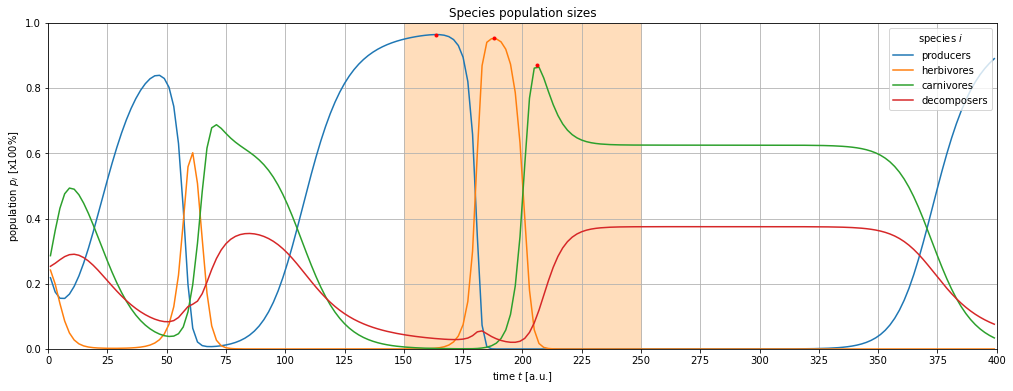

In [12]:
plt.figure(figsize=(17, 6))

plt.plot(time, populations, '-')
plt.fill_between((150., 250.), (1., 1.), color='#ffddbb')
plt.plot(xmax_herb, ymax_herb, '.r')
plt.plot(xmax_prod, ymax_prod, '.r')
plt.plot(xmax_carn, ymax_carn, '.r')
plt.xlabel('time $t$ [a.u.]'); plt.ylabel('population $p_i$ [x100%]') 
plt.title('Species population sizes')
plt.legend(('producers', 'herbivores', 'carnivores', 'decomposers'), title='species $i$', loc='upper right')
plt.axis((0., 400., 0., 1.))
plt.xticks(range(0, 401, 25)) 
plt.grid(True)

plt.show()

We will compute the *average* population sizes $\bar{\boldsymbol{p}}$ in the interval $150 \leq t \leq 250$ by means of *Romberg integration* of the function `p(t)` that was defined above.

$$
\bar{p}_i = \frac{1}{250-150} \int_{150}^{250} p_i(t) \text{d}t
$$

In [13]:
period = 1 / (250-150) 

In [14]:
avg_prod = period*Optimizers.romberg(producers, 150, 250, tol = 1e-3)
print(f'Average population size of the producers: {avg_prod:.2f}')

avg_herb = period*Optimizers.romberg(herbivores, 150, 250, tol = 1e-3)
print(f'Average population size of the herbivores: {avg_herb:.2f}')

avg_carn = period*Optimizers.romberg(carnivores, 150, 250, tol = 1e-3)
print(f'Average population size of the carnivores: {avg_carn:.2f}')

avg_deco = period*Optimizers.romberg(decomposers, 150, 250, tol = 1e-3)
print(f'Average population size of the decomposers: {avg_deco:.2f}')

Average population size of the producers: 0.29
Average population size of the herbivores: 0.19
Average population size of the carnivores: 0.36
Average population size of the decomposers: 0.16


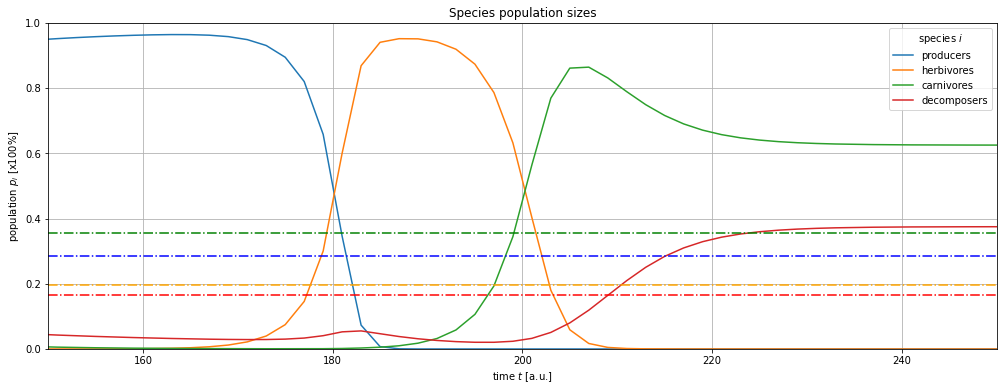

In [15]:
plt.figure(figsize=(17, 6))

plt.plot(time, populations, '-')

plt.axhline(avg_prod, ls ='-.', color = 'blue')
plt.axhline(avg_herb, ls ='-.', color = 'orange')
plt.axhline(avg_carn, ls ='-.', color = 'green')
plt.axhline(avg_deco, ls ='-.', color = 'red')

plt.xlabel('time $t$ [a.u.]'); plt.ylabel('population $p_i$ [x100%]') 
plt.title('Species population sizes')
plt.legend(('producers', 'herbivores', 'carnivores', 'decomposers'), title='species $i$', loc='upper right')
plt.axis((150., 250., 0., 1.))

plt.grid(True)

plt.show()

we will evaluate with at least 1 correct digit behind the decimal point the time $150 \leq T_{1,2} \leq 250$ when the producer and herbivore populations $p_1(t)$ and $p_2(t)$ are equal, as well as the time $150 \leq T_{2,3} \leq 250$ when the herbivore and carnivore populations $p_2(t)$ and $p_3(t)$ are equal (i.e. the visible intersections of the blue and orange curves as well as the orange and green curves in the shaded region).

In [16]:
def prod_herb_intersection(t):
    return producers(t) - herbivores(t)

def herb_carn_intersection(t):
    return carnivores(t) - herbivores(t)

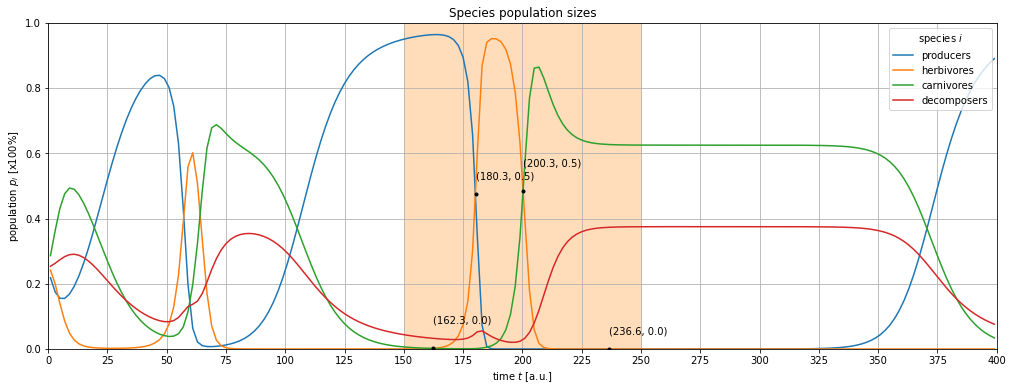

In [18]:
plt.figure(figsize=(17, 6))
plt.plot(time, populations, '-')

for (lo, hi) in list(Optimizers.rootsearch(prod_herb_intersection, 150, 250, steps = 100)):
    xmin = Optimizers.bisection(prod_herb_intersection,lo, hi, 1e-8)
    plt.plot(xmin, herbivores(xmin), '.k')
    plt.text(xmin, 0.07+herbivores(xmin), f'({xmin:.1f}, {herbivores(xmin):.1f})', verticalalignment='top')

for (lo, hi) in list(Optimizers.rootsearch(herb_carn_intersection, 150, 250, steps = 100)):
    xmin = Optimizers.bisection(herb_carn_intersection,lo, hi, 1e-8)
    plt.plot(xmin, herbivores(xmin), '.k')
    plt.text(xmin, 0.07+herbivores(xmin), f'({xmin:.1f}, {herbivores(xmin):.1f})', verticalalignment='bottom')

plt.fill_between((150., 250.), (1., 1.), color='#ffddbb')

plt.xlabel('time $t$ [a.u.]'); plt.ylabel('population $p_i$ [x100%]') 
plt.title('Species population sizes')
plt.legend(('producers', 'herbivores', 'carnivores', 'decomposers'), title='species $i$', loc='upper right')
plt.axis((0., 400., 0., 1.))
plt.xticks(range(0, 401, 25)) 
plt.grid(True)

plt.show()